In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pickle as pk

In [22]:
data = pd.read_csv(r'C:\Users\tangk\Documents\used_device_data.csv')
data.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Here, we can see that some info is missing.To clean the data, we had two options, to fill the empty data with the mean or median, or remove the entries completely. We chose the latter as it would not make sense to determine the rear camera size based on the mean and median as the models of the phone are different. Hence, we chose to remove the entries. 



In [24]:
data.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [25]:
data.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [26]:
data = data.dropna()

In [27]:
data.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [28]:
dict_G = {'yes':1,'no':0}

In [29]:
data['4g'] = data['4g'].map(dict_G)

In [30]:
data['5g'] = data['5g'].map(dict_G)

Change the yes or no to 1 or 0

In [31]:
data.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [32]:
categorical_data=pd.DataFrame(data[['device_brand', 'os','4g', '5g','rear_camera_mp','front_camera_mp','internal_memory','ram','battery','release_year','normalized_used_price','normalized_new_price']])

In [33]:
categorical_data.head()

,device_brand,os,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,release_year,normalized_used_price,normalized_new_price
0,Honor,Android,1,0,13.0,5.0,64.0,3.0,3020.0,2020,4.307572,4.715100
1,Honor,Android,1,1,13.0,16.0,128.0,8.0,4300.0,2020,5.162097,5.519018
2,Honor,Android,1,1,13.0,8.0,128.0,8.0,4200.0,2020,5.111084,5.884631
3,Honor,Android,1,1,13.0,8.0,64.0,6.0,7250.0,2020,5.135387,5.630961
4,Honor,Android,1,0,13.0,8.0,64.0,3.0,5000.0,2020,4.389995,4.947837


Number of Primary Types in device_brand: 33
Number of Primary Types in os: 4
Number of Primary Types in 4g: 2
Number of Primary Types in 5g: 2
Number of Primary Types in rear_camera_mp: 41
Number of Primary Types in front_camera_mp: 36
Number of Primary Types in internal_memory: 15
Number of Primary Types in ram: 12
Number of Primary Types in battery: 314
Number of Primary Types in release_year: 8
Number of Primary Types in normalized_used_price: 2921
Number of Primary Types in normalized_new_price: 2845


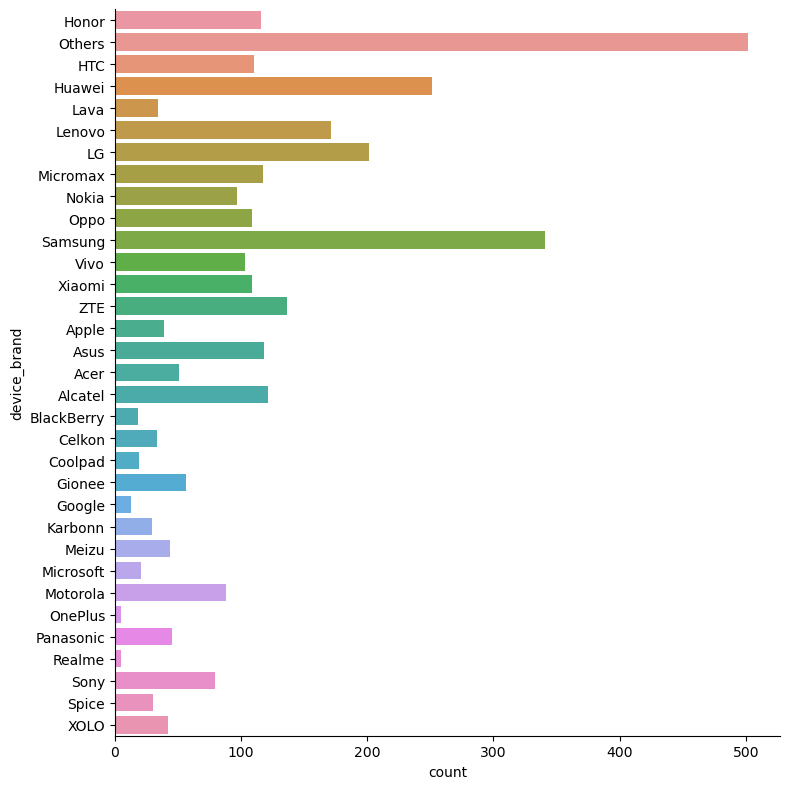

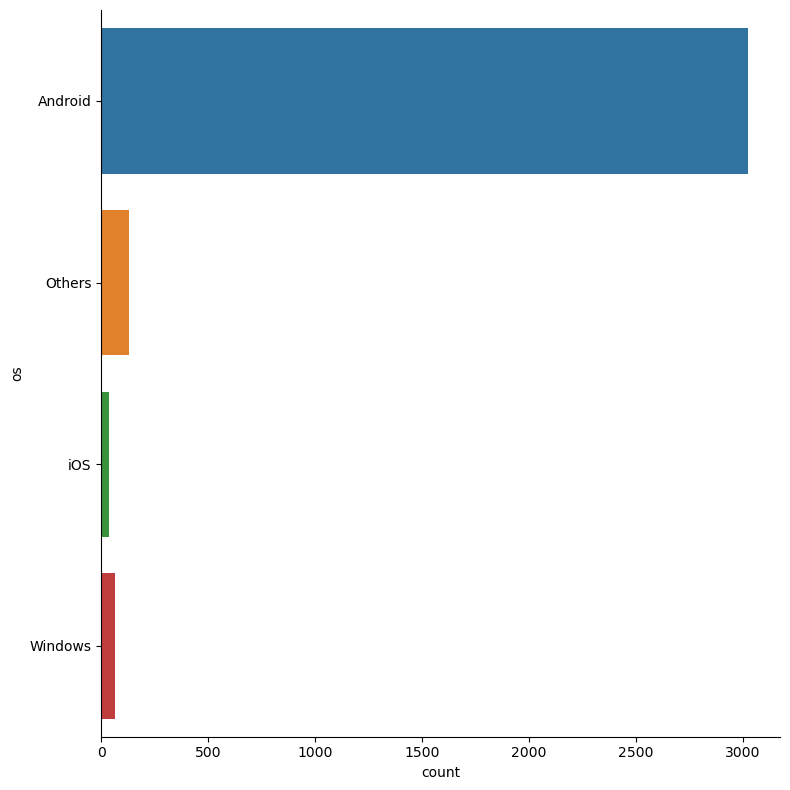

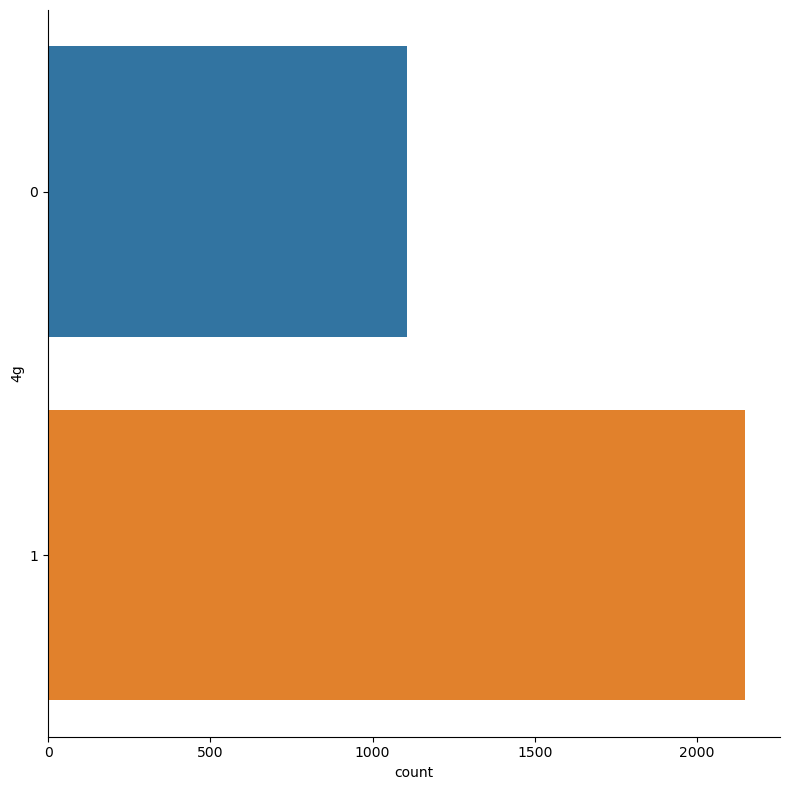

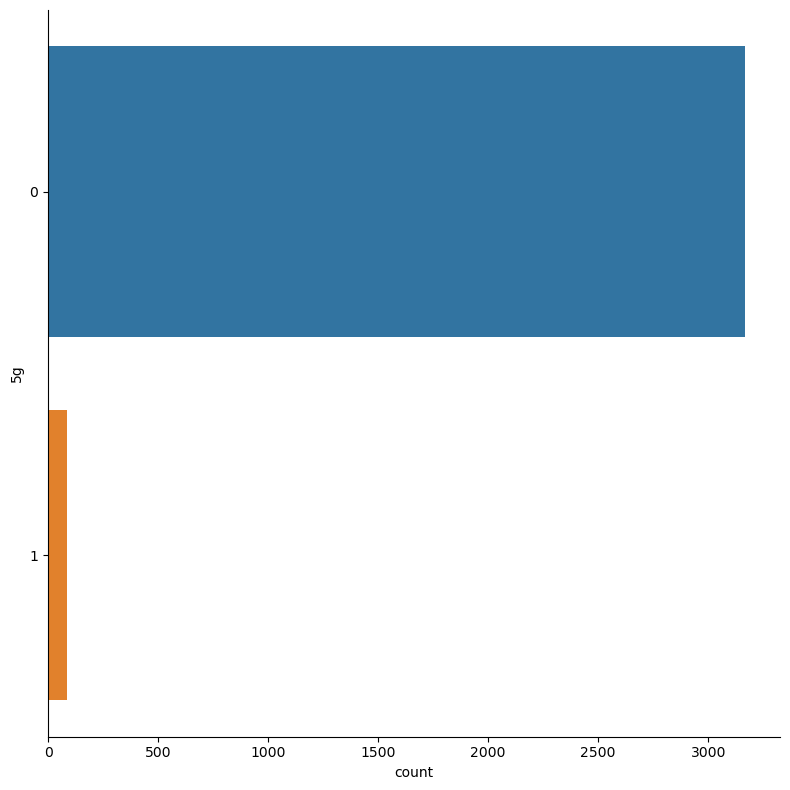

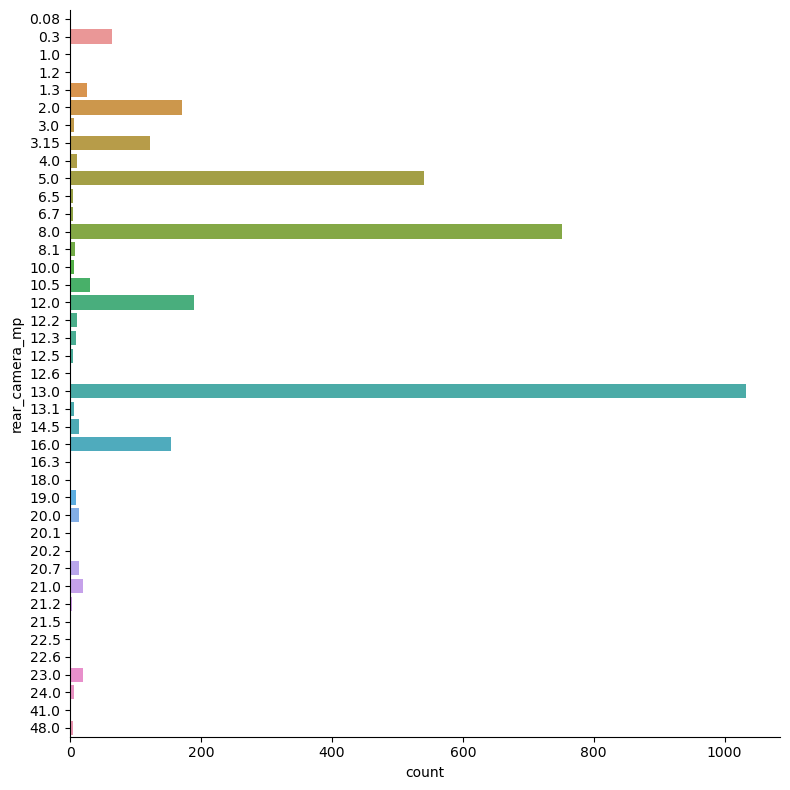

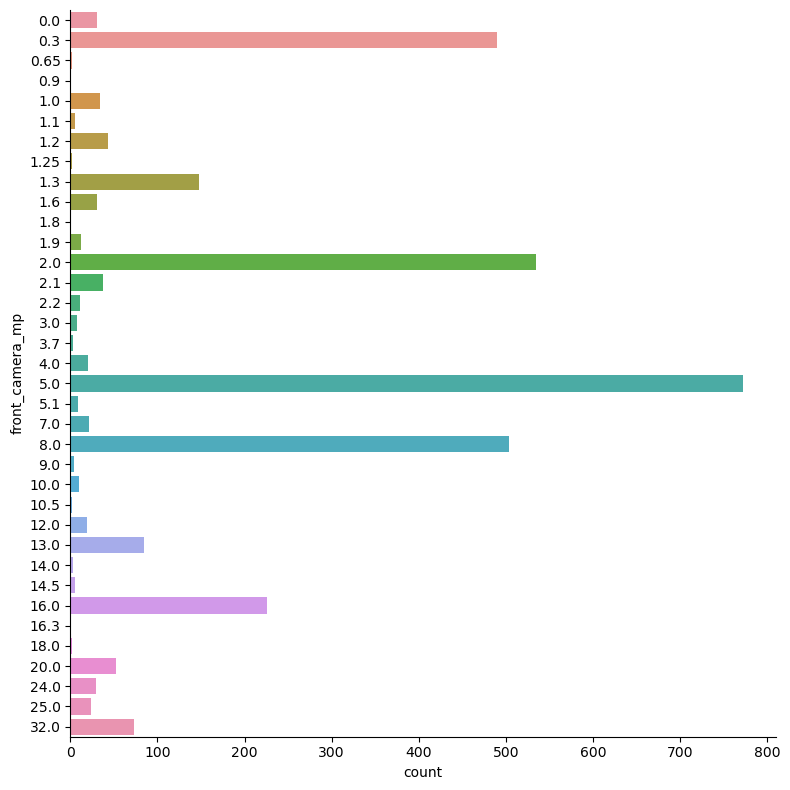

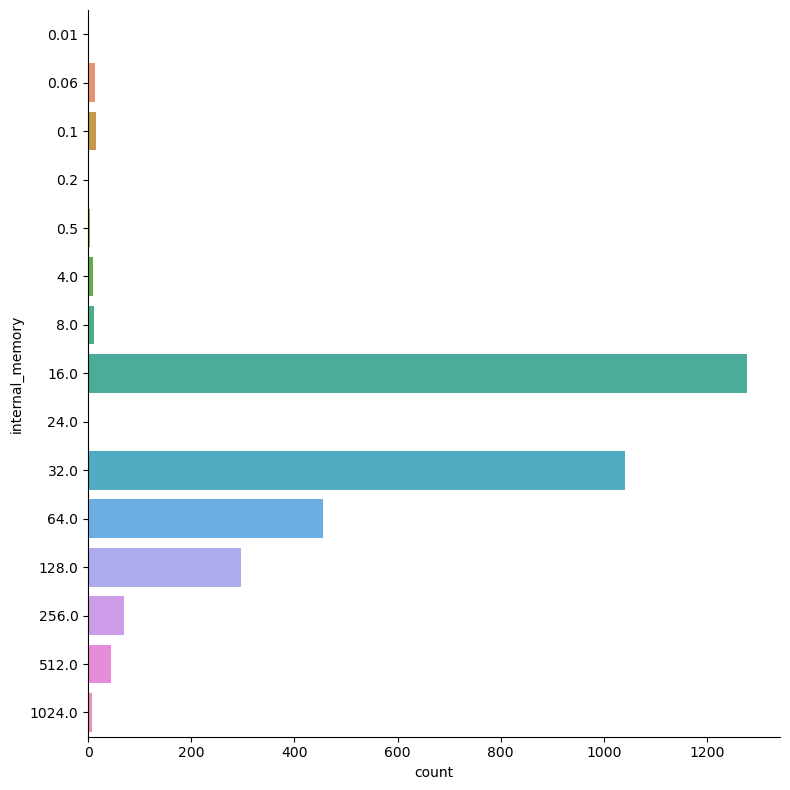

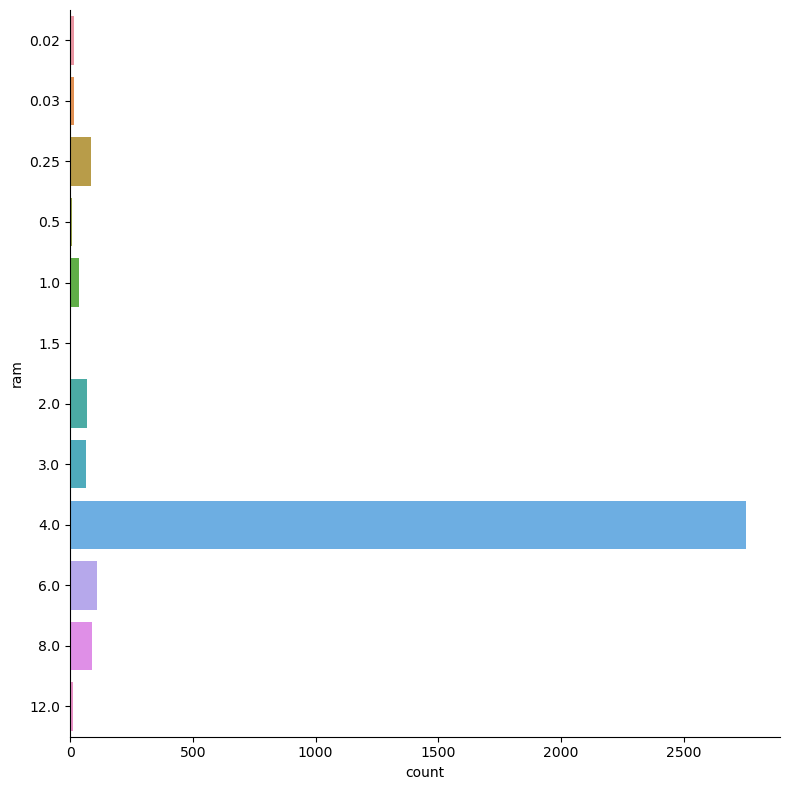

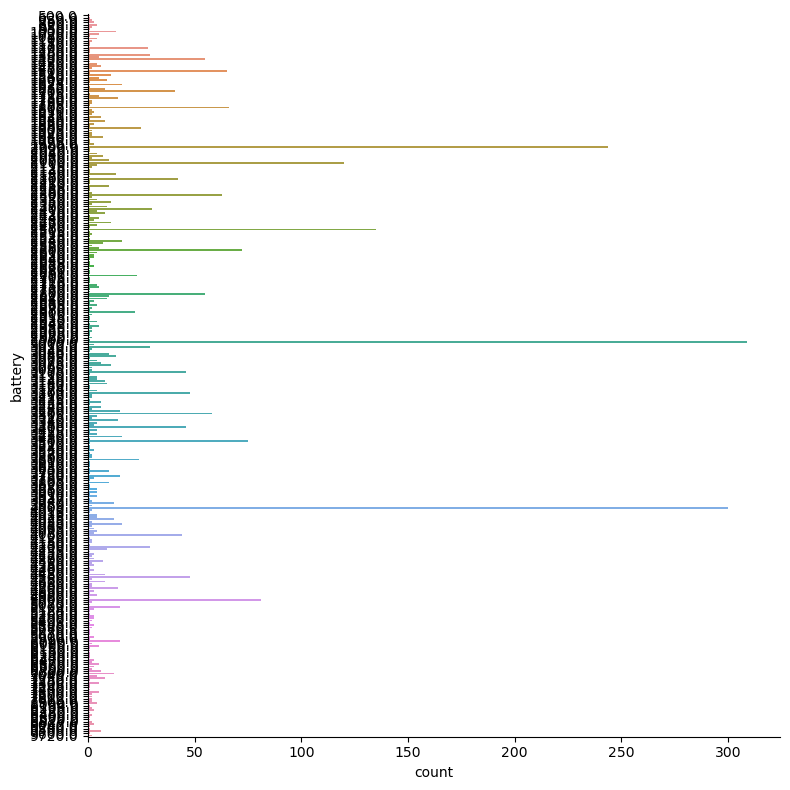

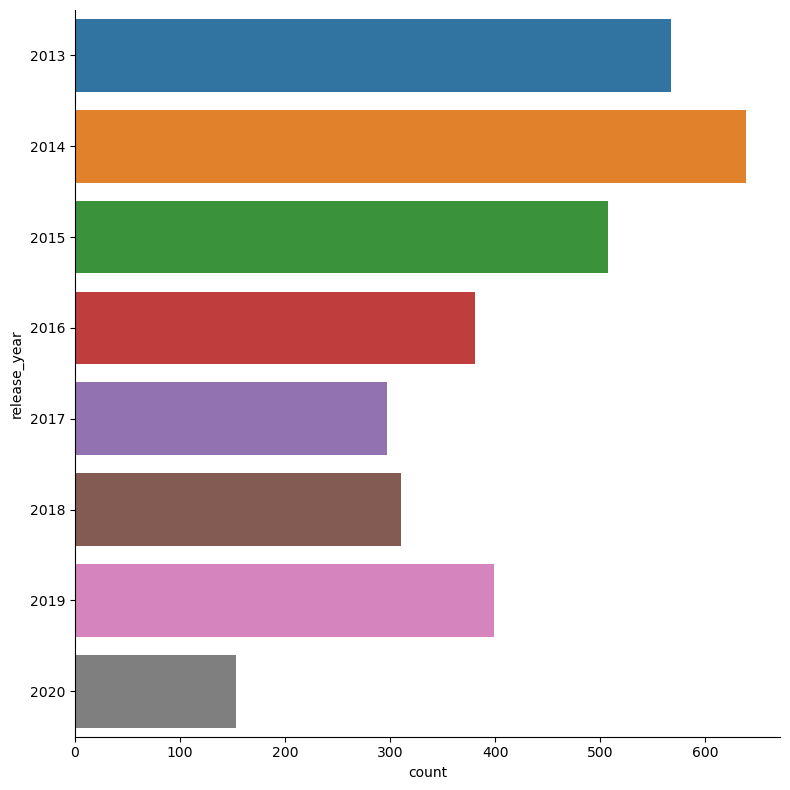

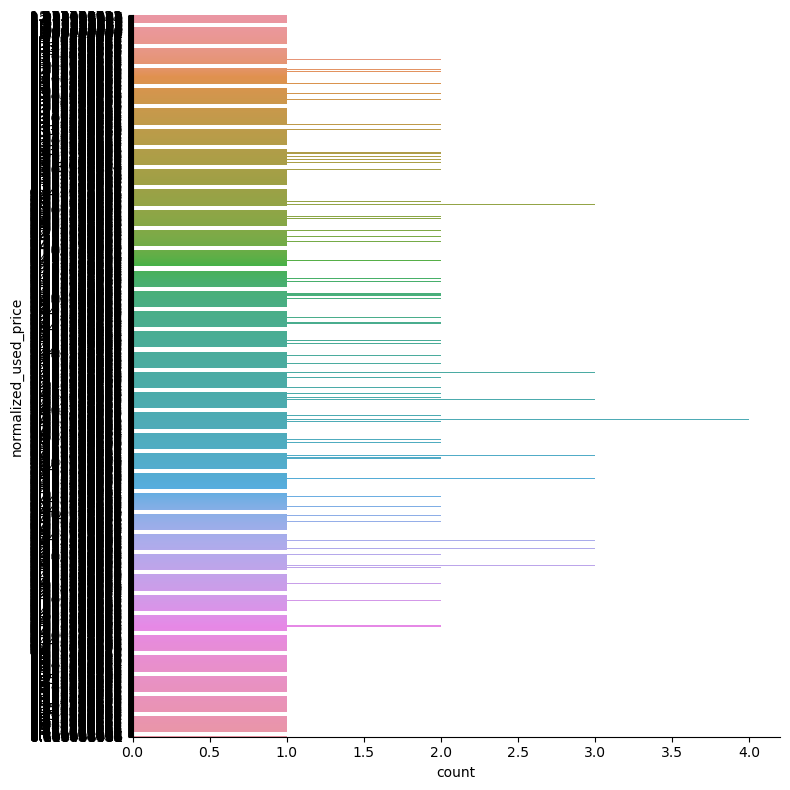

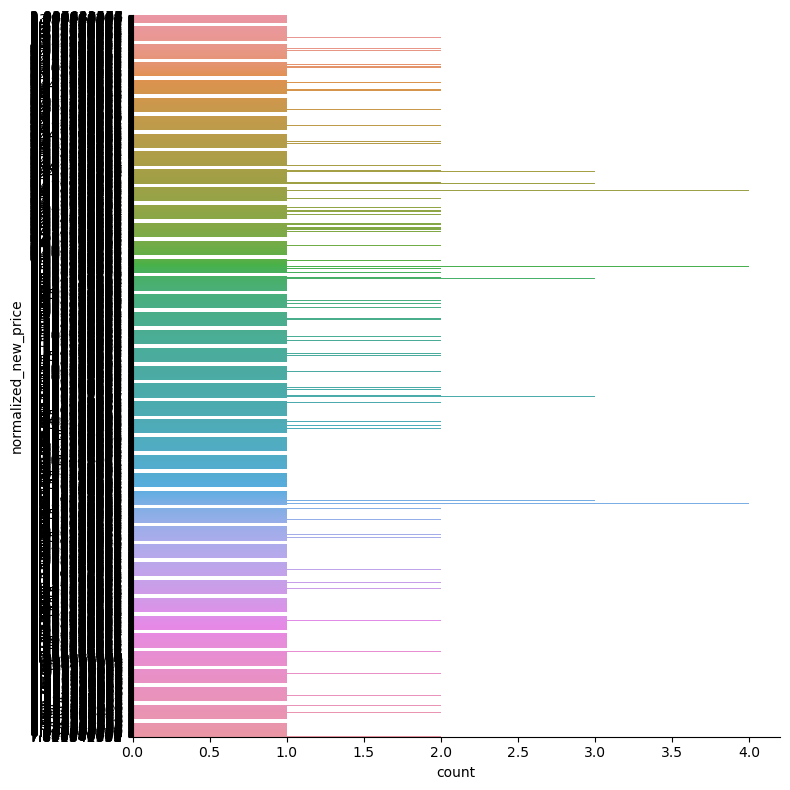

In [34]:
for var in categorical_data:
    # Primary Types in the Dataset
    print(f"Number of Primary Types in {var}:", len(categorical_data[var].unique()))
    # Pokemons of each Primary Type
    #print(categorical_data[var].value_counts())
    sb.catplot(y = var, data = categorical_data, kind = "count", height = 8)
    #sb.catplot(data=categorical_data, x=var, y="SalePrice", kind="box")
   

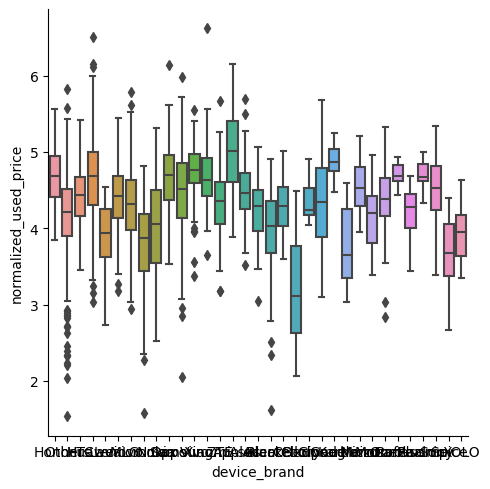

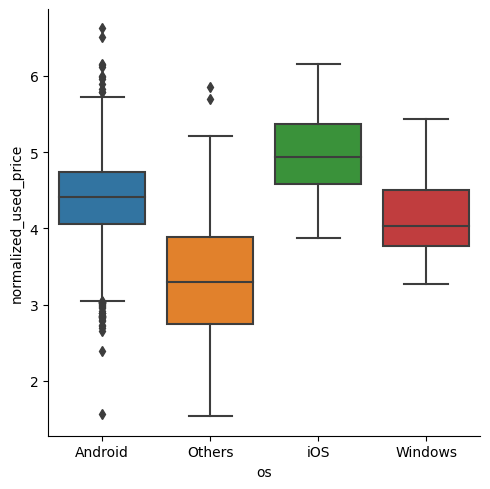

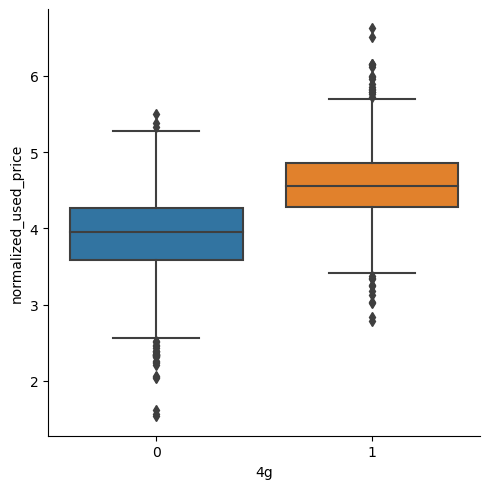

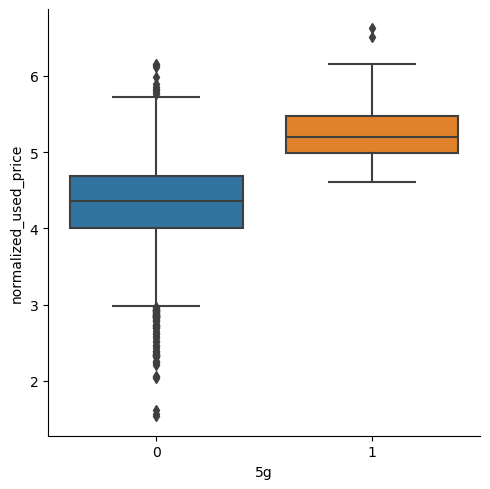

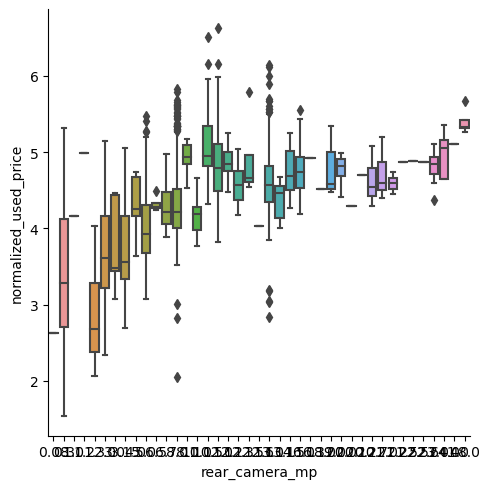

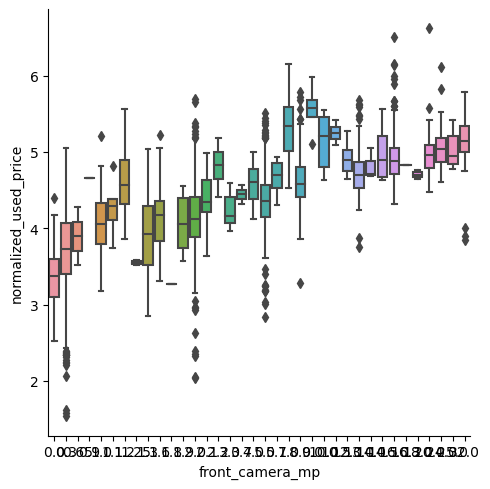

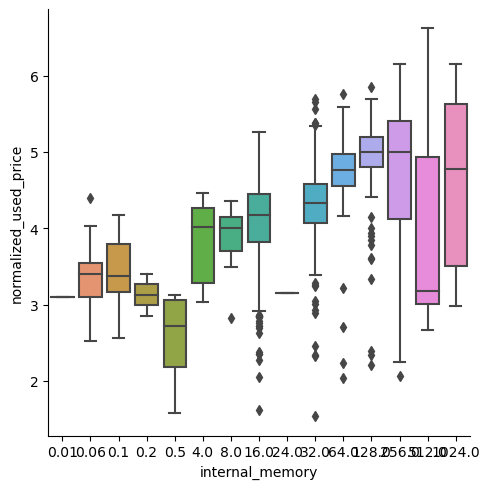

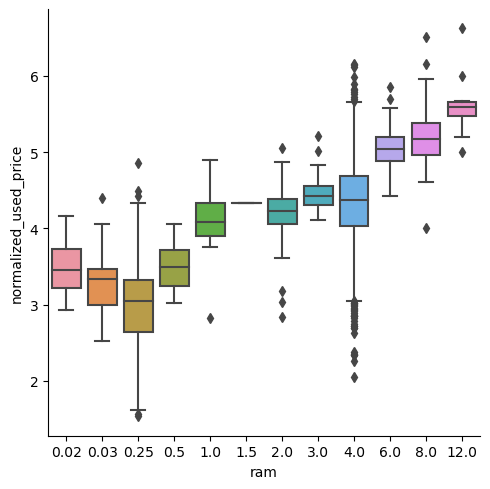

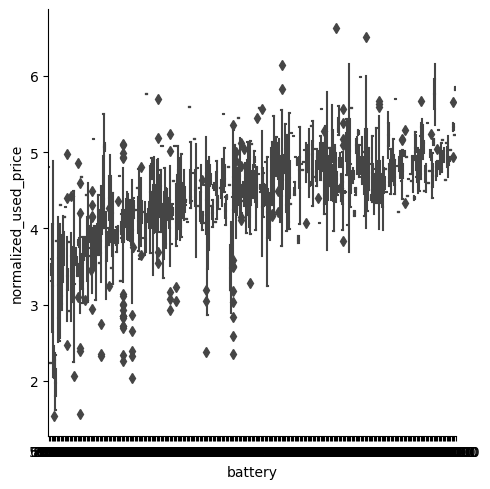

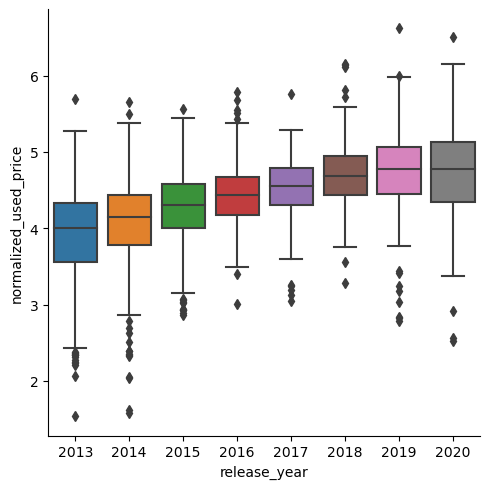

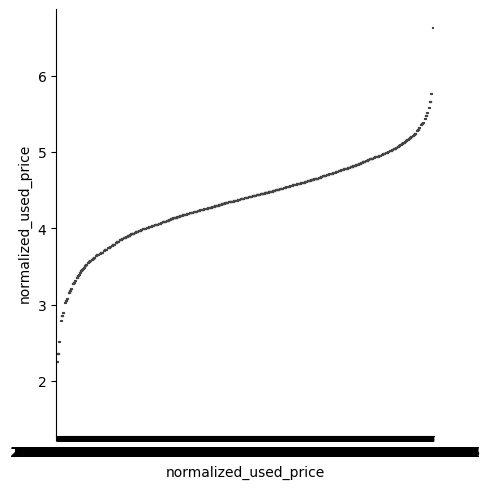

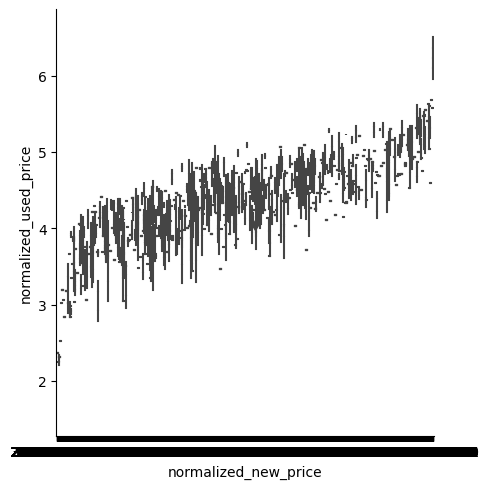

In [35]:
 for var in categorical_data:
    sb.catplot(data=categorical_data, x=var, y="normalized_used_price", kind="box")

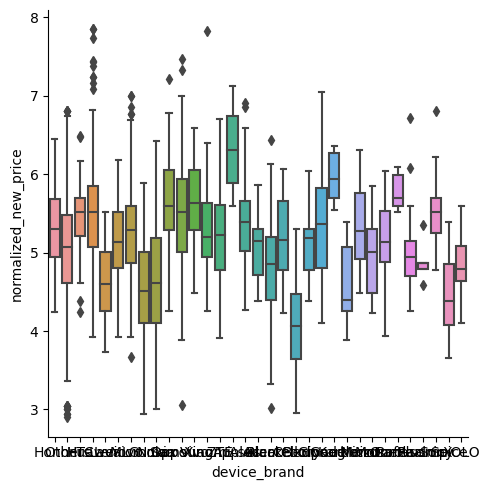

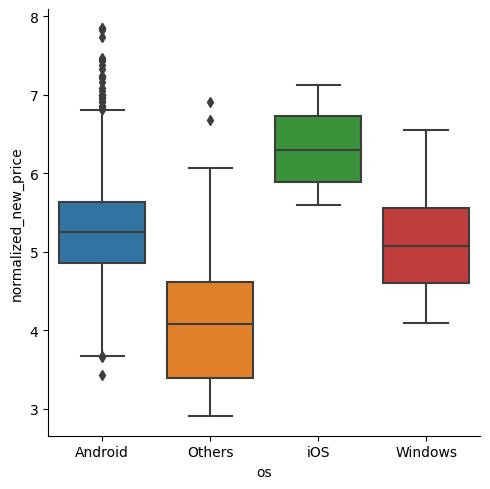

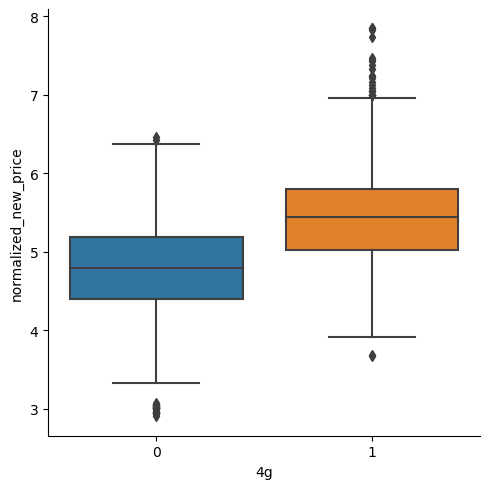

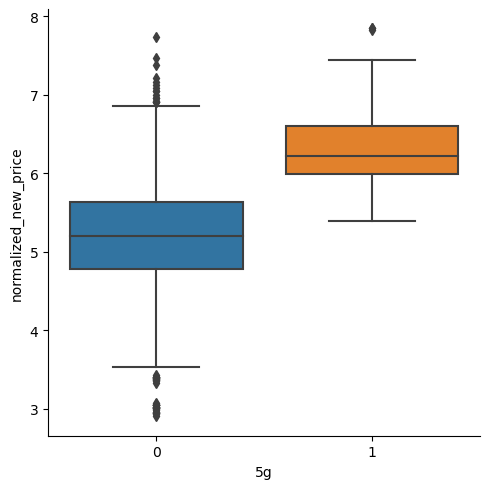

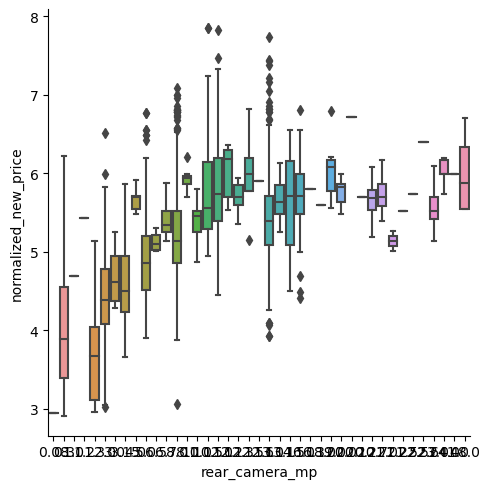

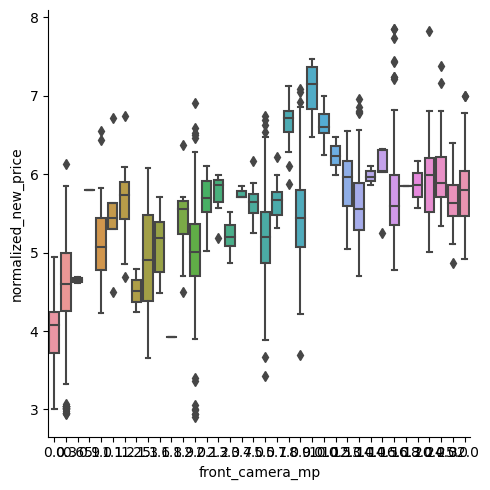

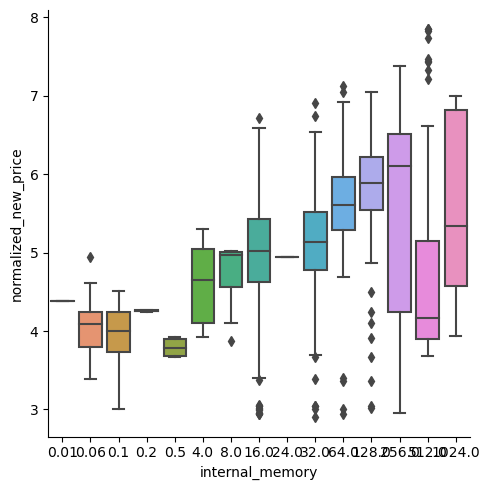

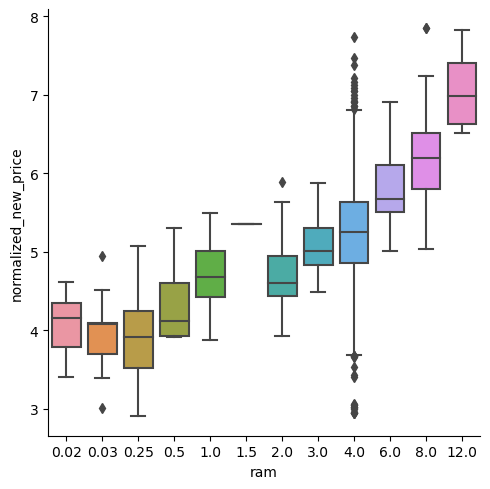

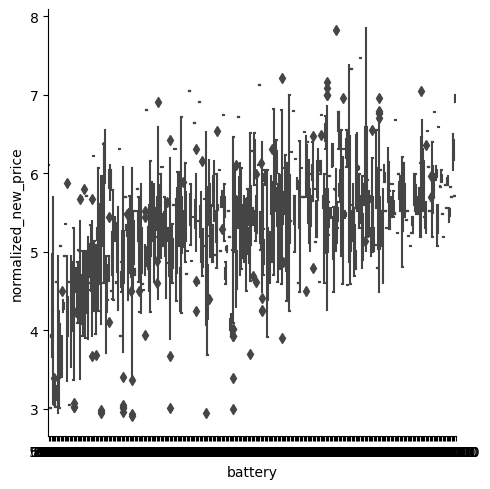

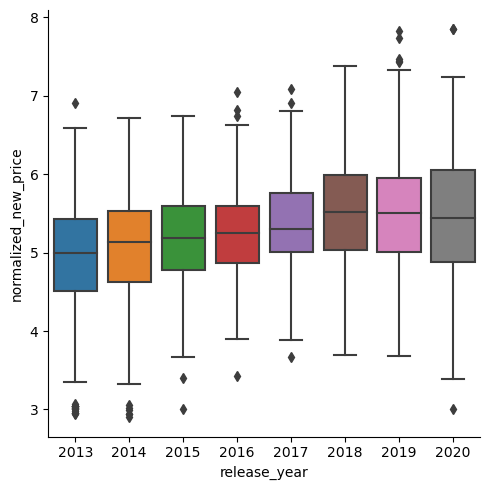

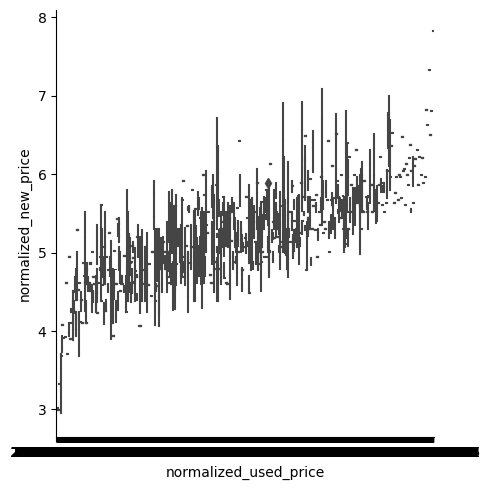

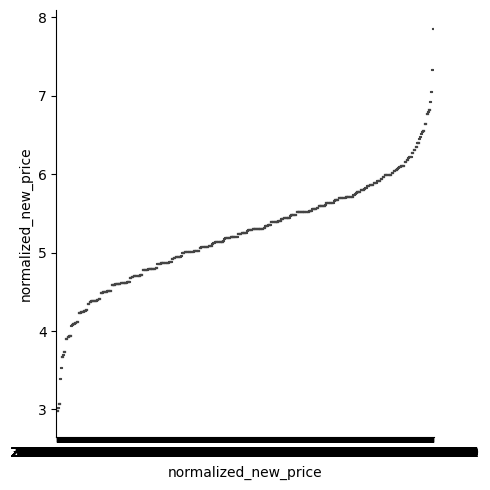

In [36]:
 for var in categorical_data:
    sb.catplot(data=categorical_data, x=var, y="normalized_new_price", kind="box")

<AxesSubplot:>

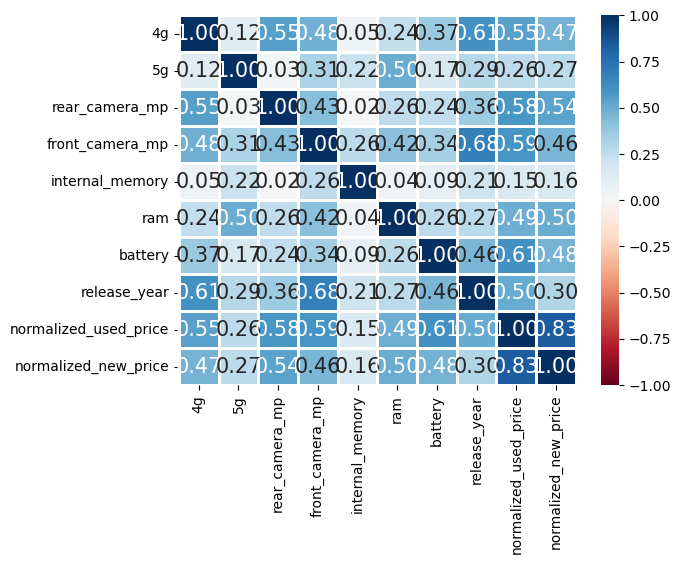

In [38]:
sb.heatmap(categorical_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 15}, cmap = "RdBu")